In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_election=pd.read_csv("C:\\Jupyter\\Task_data_analyst\\election_results_2024 (1).csv")

In [3]:
data_election.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [4]:
data_election.shape

(543, 8)

In [5]:
data_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


## 1st Observation
- **Except The Const. No. all the other data columns are objects in datatype.**
- **There are no null values**
- **Const. No. is of int datatype**
- **The Margin has Object datatype however it is intuitive that the values need to be interger so we will have to change that**
- **There are a total of 543 rows**

In [6]:
data_election.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Constituency,543,541,Maharajganj,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Const. No.,543.0,NaN,NaN,NaN,18.178637,16.42784,1.0,6.0,14.0,25.0,80.0
Leading Candidate,543,542,RAHUL GANDHI,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leading Party,543,42,Bharatiya Janata Party,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trailing Candidate,542,542,RAMCHANDRA CHOUDHARY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trailing Party,542,42,Indian National Congress,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Margin,543,543,329991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,543,2,Result Declared,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_election["Status"].unique()

array(['Result Declared', 'Uncontested'], dtype=object)

In [8]:
data_election["Status"].unique()

array(['Result Declared', 'Uncontested'], dtype=object)

In [9]:
data_election[(data_election["Status"]=="Uncontested")]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [10]:
data_election[data_election["Constituency"]=="Maharajganj"]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
332,Maharajganj,63,PANKAJ CHAUDHARY,Bharatiya Janata Party,VIRENDRA CHAUDHARY,Indian National Congress,35451,Result Declared
333,Maharajganj,19,"JANARDAN SINGH ""SIGRIWAL""",Bharatiya Janata Party,AAKASH KUMAR SINGH,Indian National Congress,102651,Result Declared


In [11]:
data_election[data_election["Leading Candidate"]=="RAHUL GANDHI"]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared


# 2nd Observation
- **There were two contituencies with the same name Maharajganj on furthur analysis it was found that both the constituencies are different**
- **There is a single contituency of Surat where the seat was uncontested**
- **For the data differentiation Both the contituencies of Maharajganj should be given a unique number**
- **Rahul Ghandhi is the leading candidate jointly for Rae Bareli and Wayanad**

In [61]:
leading_parties=data_election["Leading Party"].value_counts().reset_index()
leading_parties

,Leading Party,count
0,Bharatiya Janata Party,240
1,Indian National Congress,99
2,Samajwadi Party,37
3,All India Trinamool Congress,29
4,Dravida Munnetra Kazhagam,22
5,Telugu Desam,16
6,Janata Dal (United),12
7,Shiv Sena (Uddhav Balasaheb Thackrey),9
8,Nationalist Congress Party – Sharadchandra Pawar,8
9,Shiv Sena,7


In [13]:
#there are lots of partiies that has won seats <10, will group them as others
leading_party_counts = data_election["Leading Party"].value_counts()
parties_with_low_count = leading_party_counts[leading_party_counts <= 9].index
parties_with_low_count

Index(['Shiv Sena (Uddhav Balasaheb Thackrey)',
       'Nationalist Congress Party – Sharadchandra Pawar', 'Shiv Sena',
       'Independent', 'Lok Janshakti Party(Ram Vilas)',
       'Communist Party of India (Marxist)',
       'Yuvajana Sramika Rythu Congress Party', 'Rashtriya Janata Dal',
       'Indian Union Muslim League', 'Jharkhand Mukti Morcha',
       'Aam Aadmi Party', 'Rashtriya Lok Dal',
       'Communist Party of India (Marxist-Leninist) (Liberation)',
       'Communist Party of India', 'Jammu & Kashmir National Conference',
       'Janasena Party', 'Janata Dal (Secular)',
       'Viduthalai Chiruthaigal Katch', 'Hindustani Awam Morcha (Secular)',
       'Sikkim Krantikari Morcha', 'Voice of the People Party',
       'Nationalist Congress Party', 'Aazad Samaj Party (Kanshi Ram)',
       'Rashtriya Loktantrik Party', 'Shiromani Akali Dal',
       'Apna Dal (Soneylal)', 'AJSU Party', 'Zoram People’s Movement',
       'Kerala Congress', 'Revolutionary Socialist Party',
      

In [14]:
Trailing_party_counts=data_election["Trailing Party"].value_counts()
Trailing_parties_low_count= Trailing_party_counts[Trailing_party_counts<=8].index
Trailing_parties_low_count

Index(['Shiv Sena', 'Independent', 'Communist Party of India',
       'Janata Dal (United)',
       'Nationalist Congress Party – Sharadchandra Pawar',
       'Vikassheel Insaan Party', 'Nationalist Congress Party',
       'Desiya Murpokku Dravida Kazhagam',
       'Communist Party of India (Marxist-Leninist) (Liberation)',
       'Bharat Rashtra Samith', 'Bahujan Samaj Party',
       'Jammu & Kashmir Peoples Democratic Party', 'Jharkhand Mukti Morcha',
       'Nationalist Democratic Progressive Party',
       'Citizen Action Party-Sikkim', 'Naga Peoples Front',
       'Rashtriya Samaj Paksha', 'Mizo National Front', 'Apna Dal (Soneylal)',
       'Kerala Congress (M)', 'Amma Makkal Munnettra Kazagam',
       'Suheldev Bharatiya Samaj Party', 'Bodoland Peoples Front',
       'Telugu Desam', 'Janata Dal (Secular)', 'Assam Jatiya Parishad',
       'All India United Democratic Front', 'Pattali Makkal Katch',
       'Jammu & Kashmir National Conference',
       'All India Majlis-E-Ittehadul

In [15]:
data_new=data_election.copy()

In [16]:
data_new.loc[data_new["Leading Party"].isin(parties_with_low_count), "Leading Party"] = "Others"

In [17]:
data_new.loc[data_new["Trailing Party"].isin(Trailing_parties_low_count), "Trailing Party"] = "Others"

In [18]:
data_new["Trailing Party"].value_counts()

Trailing Party
Indian National Congress                    167
Bharatiya Janata Party                      153
Others                                       61
All India Anna Dravida Munnetra Kazhagam     24
Samajwadi Party                              24
Yuvajana Sramika Rythu Congress Party        21
Biju Janata Dal                              21
Rashtriya Janata Dal                         18
Communist Party of India (Marxist)           17
All India Trinamool Congress                 13
Aam Aadmi Party                              13
Shiv Sena (Uddhav Balasaheb Thackrey)        10
Name: count, dtype: int64

In [19]:
data_new["Leading Party"].value_counts()

Leading Party
Bharatiya Janata Party          240
Indian National Congress         99
Others                           88
Samajwadi Party                  37
All India Trinamool Congress     29
Dravida Munnetra Kazhagam        22
Telugu Desam                     16
Janata Dal (United)              12
Name: count, dtype: int64

In [20]:
data_new["Trailing Party"].value_counts()

Trailing Party
Indian National Congress                    167
Bharatiya Janata Party                      153
Others                                       61
All India Anna Dravida Munnetra Kazhagam     24
Samajwadi Party                              24
Yuvajana Sramika Rythu Congress Party        21
Biju Janata Dal                              21
Rashtriya Janata Dal                         18
Communist Party of India (Marxist)           17
All India Trinamool Congress                 13
Aam Aadmi Party                              13
Shiv Sena (Uddhav Balasaheb Thackrey)        10
Name: count, dtype: int64

# Univariate Analysis

<Axes: xlabel='Trailing Party', ylabel='Count'>

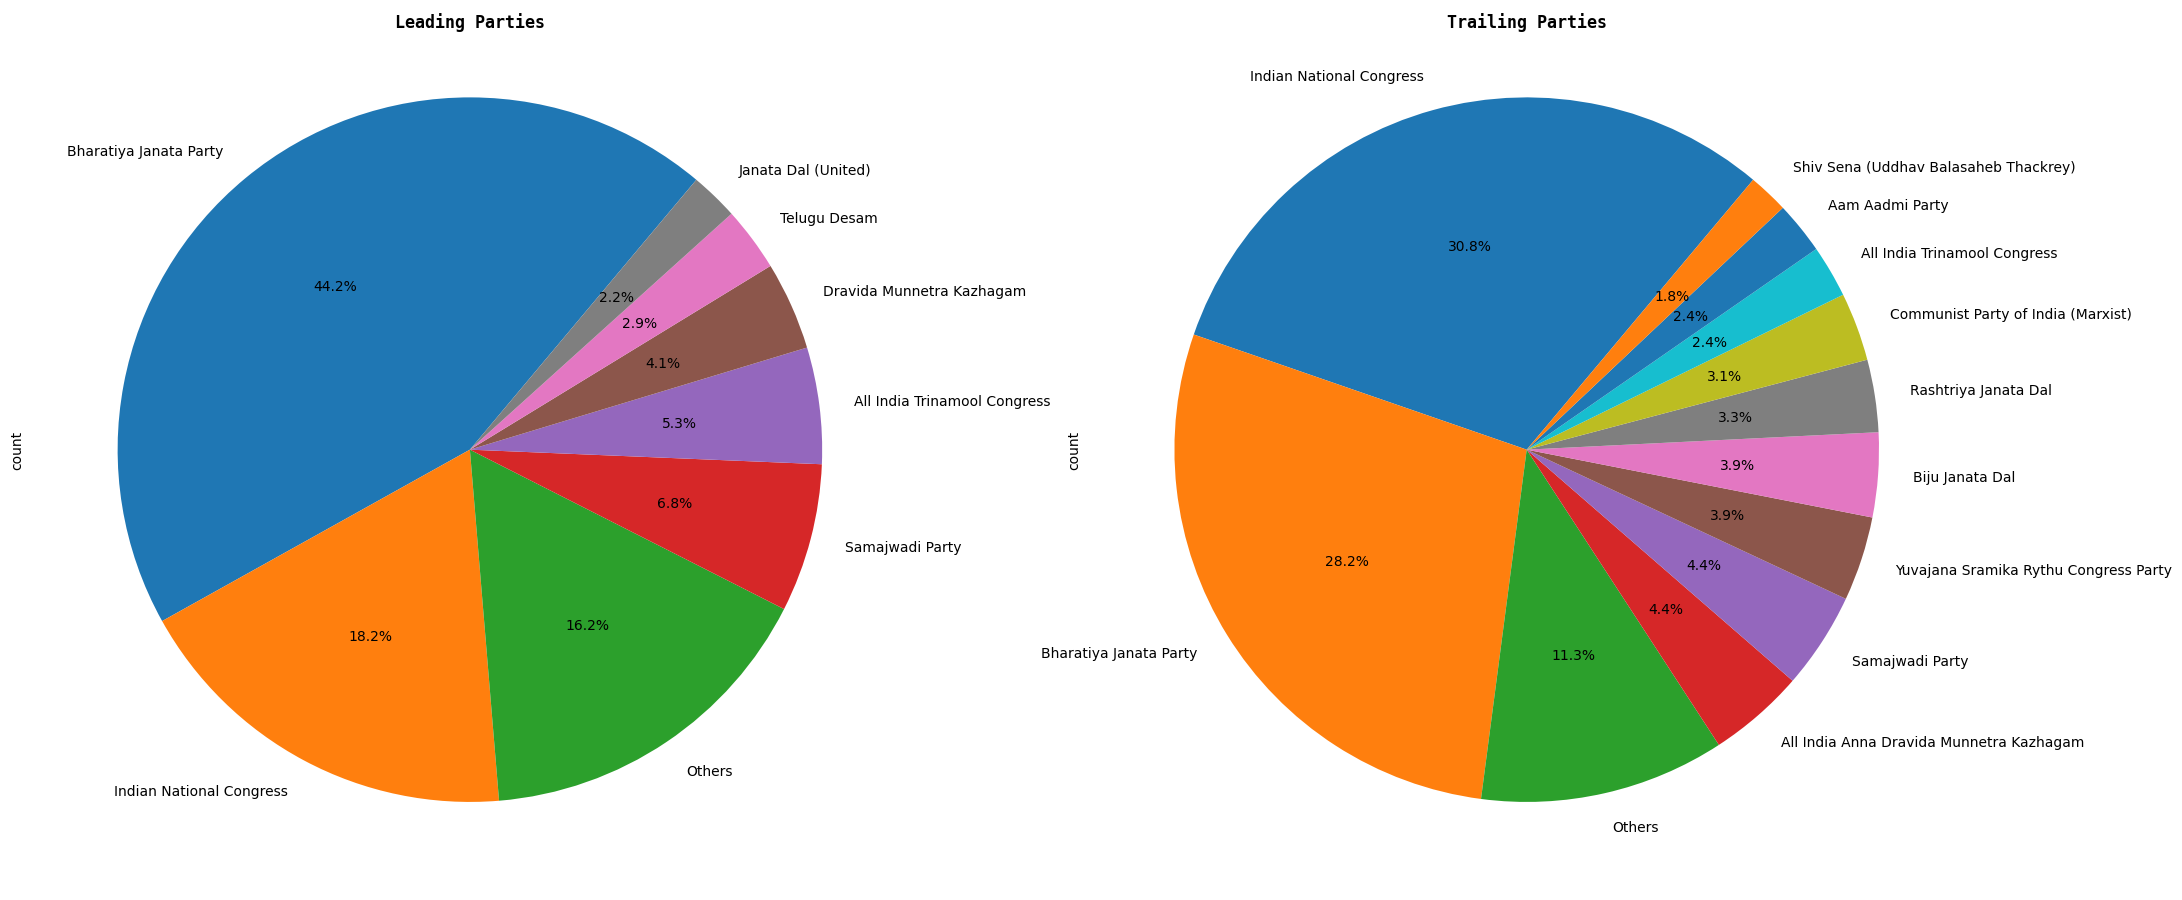

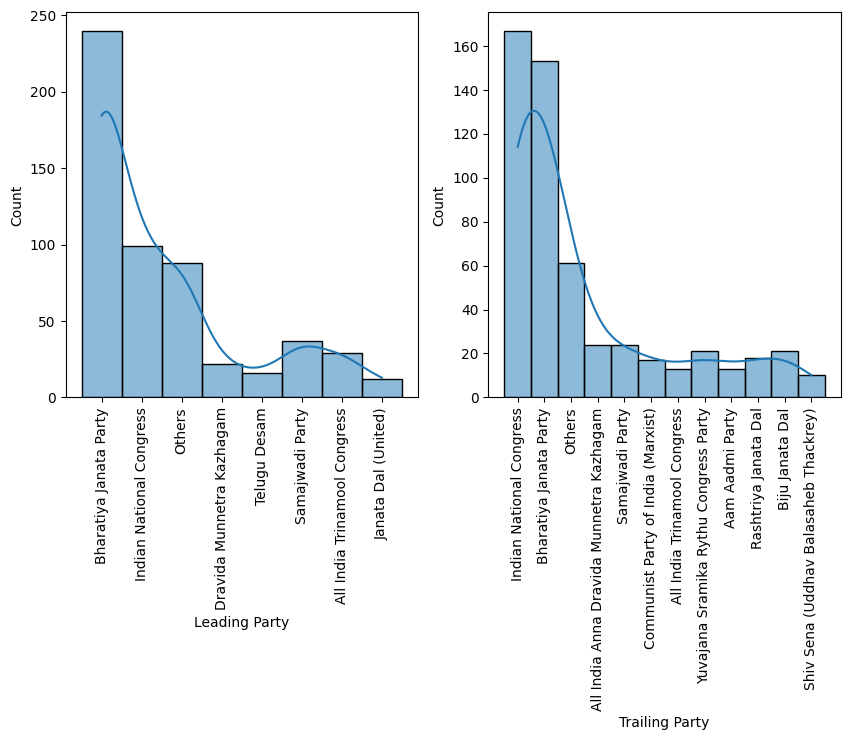

In [111]:
plt.figure(figsize=(25,15))
plt.subplot(1,2,1)
plt.text(0,1.2,"Leading Parties",fontsize=12,fontweight="bold",fontfamily="monospace",ha="center")
data_new["Leading Party"].value_counts().plot.pie(startangle=50,autopct="%1.1f%%")
plt.subplot(1,2,2)
plt.text(0,1.2,"Trailing Parties",fontsize=12,fontweight="bold",fontfamily="monospace",ha="center")
data_new["Trailing Party"].value_counts().plot.pie(startangle=50,autopct="%1.1f%%")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# plt.text(0,1.2,"Leading Parties",fontsize=12,fontweight="bold",fontfamily="monospace",ha="center")
plt.xticks(rotation=90)
sns.histplot(data=data_new,x="Leading Party",kde=True,palette ="bright")
plt.subplot(1,2,2)
# plt.text(0,1.2,"Trailing Parties",fontsize=12,fontweight="bold",fontfamily="monospace",ha="center")
plt.xticks(rotation=90)
sns.histplot(data=data_new,x="Trailing Party",kde=True,palette='bright')


## 3rd Observation
- **The Bharatiya Janata Party had the highest voat share with a percentage of 44.20%.**
- **Indian National Congress was the largest Trailing party**


In [62]:
data_election["Margin"]=pd.to_numeric(data_election["Margin"],errors="coerce")

In [72]:
top5_margin=data_election.sort_values(by='Margin', ascending=False).head(5)
top5_margin

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092.0,Result Declared
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476.0,Result Declared
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408.0,Result Declared
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551.0,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716.0,Result Declared


In [75]:
bottom5_margin=data_election.sort_values(by='Margin', ascending=True).head(5)
bottom5_margin

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
357,Mumbai North West,27,RAVINDRA DATTARAM WAIKAR,Shiv Sena,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),48.0,Result Declared
40,Attingal,19,ADV ADOOR PRAKASH,Indian National Congress,V JOY,Communist Party of India (Marxist),684.0,Result Declared
236,Jajpur,8,RABINDRA NARAYAN BEHERA,Bharatiya Janata Party,SARMISTHA SETHI,Biju Janata Dal,1587.0,Result Declared
226,JAIPUR RURAL,6,RAO RAJENDRA SINGH,Bharatiya Janata Party,ANIL CHOPRA,Indian National Congress,1615.0,Result Declared
256,KANKER,11,BHOJRAJ NAG,Bharatiya Janata Party,BIRESH THAKUR,Indian National Congress,1884.0,Result Declared


<Axes: xlabel='bottom 5 margin'>

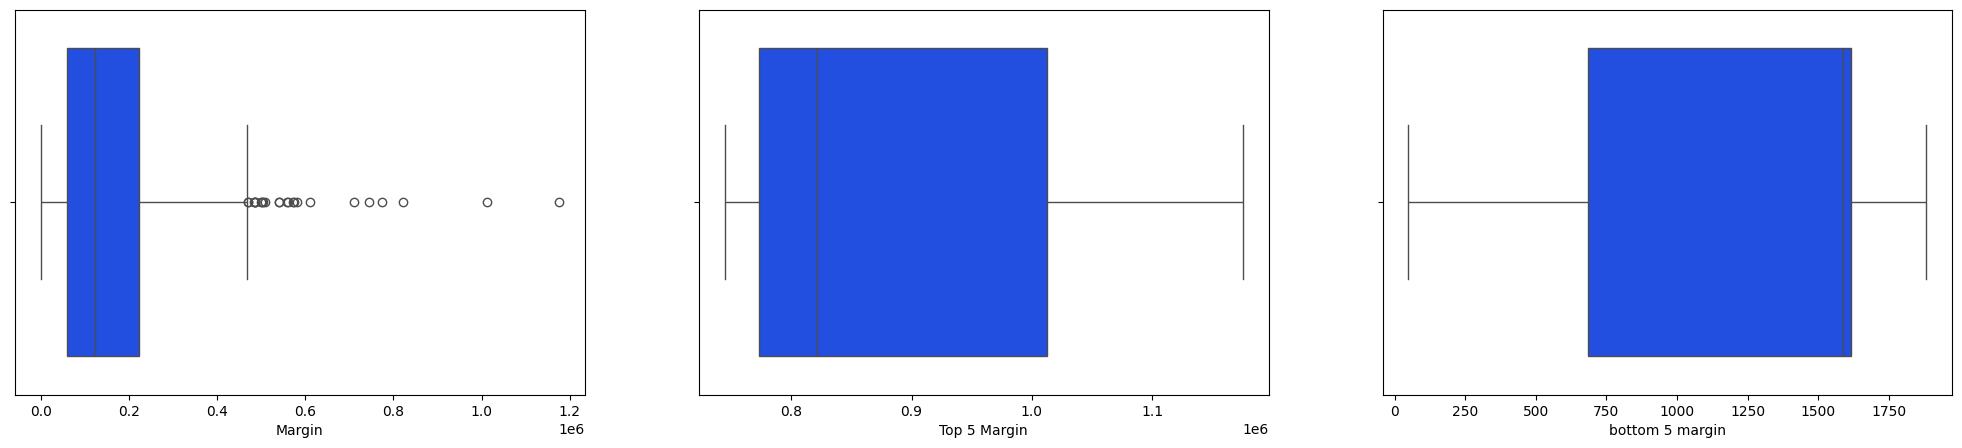

In [118]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.xlabel("Margin")
sns.boxplot(data=data_election,x="Margin",palette='bright')
plt.subplot(1,3,2)
plt.xlabel("Top 5 Margin")
sns.boxplot(data=top5_margin,x="Margin",palette='bright')
plt.subplot(1,3,3)
plt.xlabel("bottom 5 margin")
sns.boxplot(data=bottom5_margin,x="Margin",palette='bright')


## 4th Observation
- **Shankar Lalwani from BJP had won with the highest margin in 2024 Lok sabha election**
- **Ravindra Dattaram Waikar won with the lowest margin of 48**
- **Outliers are present in the election margin**
- **Among the top 5 Margins 75% of candidates won with a winning margin of more than 1lakh**

## Bibariate Analysis

Text(0.5, 0.98, 'Margin vs Leading Party')

<Figure size 10000x3000 with 0 Axes>

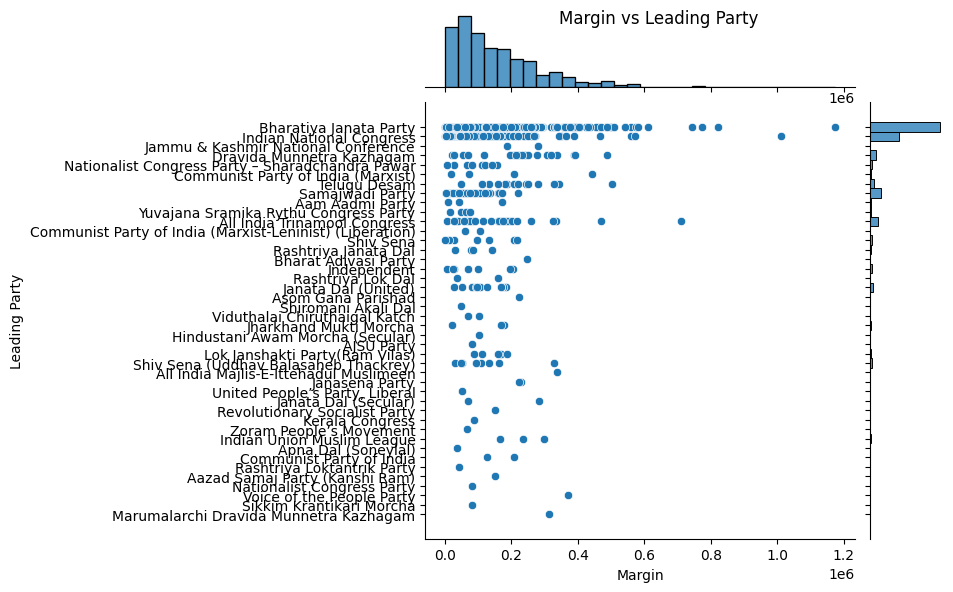

In [145]:
plt.figure(figsize=(100,30))
sns.jointplot(data=data_election,x="Margin",y="Leading Party")
plt.suptitle("Margin vs Leading Party")

## Observation
- **Bharatiya Janata Party candidates has won the highest margins**
- **Parties like INC, J&K National Congress and DMK stands 2nd 3rd and 4th respectively in achieving highest margins**